In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from vtk_rw import read_vtk
from plotting import plot_surf_stat_map, crop_img
import matplotlib as mpl

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
def load_pickle(pkl_file):
    pkl_in = open(pkl_file, 'r')
    pkl_dict = pickle.load(pkl_in)
    pkl_in.close()
    return pkl_dict

In [4]:
def brain_fig(plot_list):
    sns.set_style('white')
    n = len(plot_list)
    rows = int(n/4)
    fig = plt.figure(figsize=(40,rows*5))
    for img in range(n):
        ax = fig.add_subplot(rows,4,img+1)
        plt.imshow(plot_list[img])
        ax.set_axis_off()
    fig.tight_layout()
    fig.subplots_adjust(right=0.7)
    return fig

In [5]:
lh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/lh_lowres_new_infl1000.vtk'
lh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/lh_sulc.npy'
rh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/rh_lowres_new_infl1000.vtk'
rh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/rh_sulc.npy'
fullmask_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/fullmask_lh_rh_new.npy'
lh_sulc = np.load(lh_sulc_file)
lv, lf, _ = read_vtk(lh_mesh_file)
rh_sulc = np.load(rh_sulc_file)
rv, rf, _ = read_vtk(rh_mesh_file)
fullmask = np.load(fullmask_file)

In [6]:
#embed_file='/scr/ilz3/myelinconnect/new_groupavg/embed/both_smooth_3_embed.npy'
dict_file='/scr/ilz3/myelinconnect/new_groupavg/embed/both_smooth_3_embed_dict.pkl'
embed_dict = load_pickle(dict_file)

In [7]:
# normalize vectors
embed_masked = np.zeros((embed_dict['vectors'].shape[0], embed_dict['vectors'].shape[1]-1))
for comp in range(100):
    embed_masked[:,comp]=(embed_dict['vectors'][:,comp+1]/embed_dict['vectors'][:,0])

# unmask the embedding, that has been saved in masked form
idcs=np.arange(0,(lv.shape[0]+rv.shape[0]))
nonmask=np.delete(idcs, fullmask)
embed = np.zeros(((lv.shape[0]+rv.shape[0]),100))
embed[nonmask] = embed_masked

In [8]:
lower_file = '/scr/ilz3/myelinconnect/new_groupavg/profiles/lower/both_group_avg_profiles_lower.npy'
upper_file = '/scr/ilz3/myelinconnect/new_groupavg/profiles/upper/both_group_avg_profiles_upper.npy'
lower= np.load(lower_file)
upper = np.load(upper_file)

In [33]:
lower_avg = np.mean(lower[:,6:], axis=1)
upper_avg = np.mean(upper[:,:5], axis=1)

In [34]:
lower_avg[fullmask]=0
upper_avg[fullmask]=0

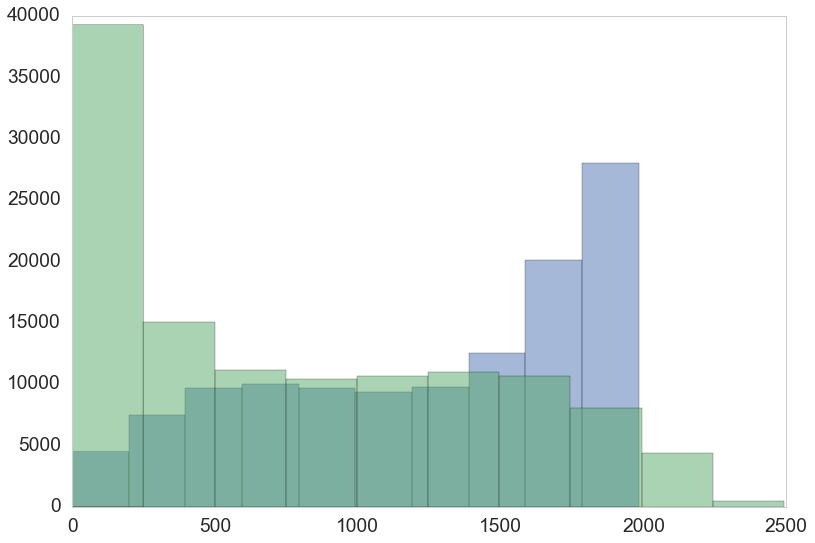

In [37]:
plt.hist(lower_avg[lower_avg!=0], alpha=0.5);
plt.hist(upper_avg[lower_avg!=0], alpha=0.5);

In [27]:
sns.set_style('white')
plots_fig1 = []
vmin = 1500 
vmax = 2500 
embed_vmin=-2.2
embed_vmax=2.4

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=upper_avg[:lv.shape[0]], bg_map=lh_sulc, 
                            bg_on_stat=False, darkness=0.8, elev=elev,azim=azim, figsize=(10,7.5) ,
                            threshold=1e-50, cmap='cubehelix_r')#, vmin=vmin, vmax = vmax, symmetric_cbar=False)
    plots_fig1.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=upper_avg[lv.shape[0]:], bg_map=rh_sulc, 
                            bg_on_stat=False, darkness=0.8, elev=elev,azim=azim, figsize=(10,7.7) ,
                            threshold=1e-50, cmap='cubehelix_r')#, vmin=vmin, vmax=vmax,symmetric_cbar=False)
    plots_fig1.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=lower_avg[:lv.shape[0]], bg_map=lh_sulc, 
                            bg_on_stat=False, darkness=0.8, elev=elev,azim=azim, figsize=(10,7.5) ,
                            threshold=1e-50, cmap='cubehelix_r')#, vmin=vmin, vmax = vmax, symmetric_cbar=False)
    plots_fig1.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=lower_avg[lv.shape[0]:], bg_map=rh_sulc, 
                            bg_on_stat=False, darkness=0.8, elev=elev,azim=azim, figsize=(10,7.7) ,
                            threshold=1e-50, cmap='cubehelix_r')#, vmin=vmin, vmax=vmax,symmetric_cbar=False)
    plots_fig1.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=-embed[:lv.shape[0],0], bg_map=lh_sulc, 
                            bg_on_stat=False, darkness=0.8, elev=elev,azim=azim, figsize=(10,7.5), 
                            threshold=1e-50, cmap='cubehelix_r', symmetric_cbar=False,
                           vmin=embed_vmin, vmax=embed_vmax)
    plots_fig1.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=-embed[lv.shape[0]:,0], bg_map=rh_sulc, 
                            bg_on_stat=False, darkness=0.8, elev=elev,azim=azim, figsize=(10,7.7) ,
                            threshold=1e-50, cmap='cubehelix_r',symmetric_cbar=False, 
                           vmin=embed_vmin, vmax=embed_vmax)
    plots_fig1.append(crop_img(plot))

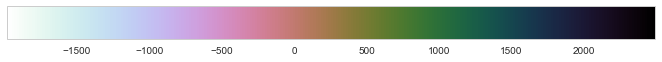

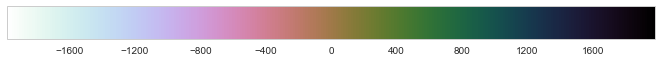

In [18]:
sns.set_style('whitegrid')
cubehelix = plt.get_cmap('cubehelix_r')
norm_lower = mpl.colors.Normalize(vmin=lower_avg.max(), vmax=-lower_avg.max())
norm_upper = mpl.colors.Normalize(vmin=upper_avg.max(), vmax=-lower_avg.max())
fig_hcbar = plt.figure(figsize=(10, 3))
ax1 = fig_hcbar.add_axes([0.05, 0.80, 0.9, 0.15])
mpl.colorbar.ColorbarBase(ax1, cmap=cubehelix,norm=norm_upper,orientation='horizontal')#, ticks=[1700, 1900, 2100, 2300])
fig_hcbar = plt.figure(figsize=(10, 3))
ax1 = fig_hcbar.add_axes([0.05, 0.80, 0.9, 0.15])
mpl.colorbar.ColorbarBase(ax1, cmap=cubehelix,norm=norm_lower,orientation='horizontal')#, ticks=[1700, 1900, 2100, 2300])

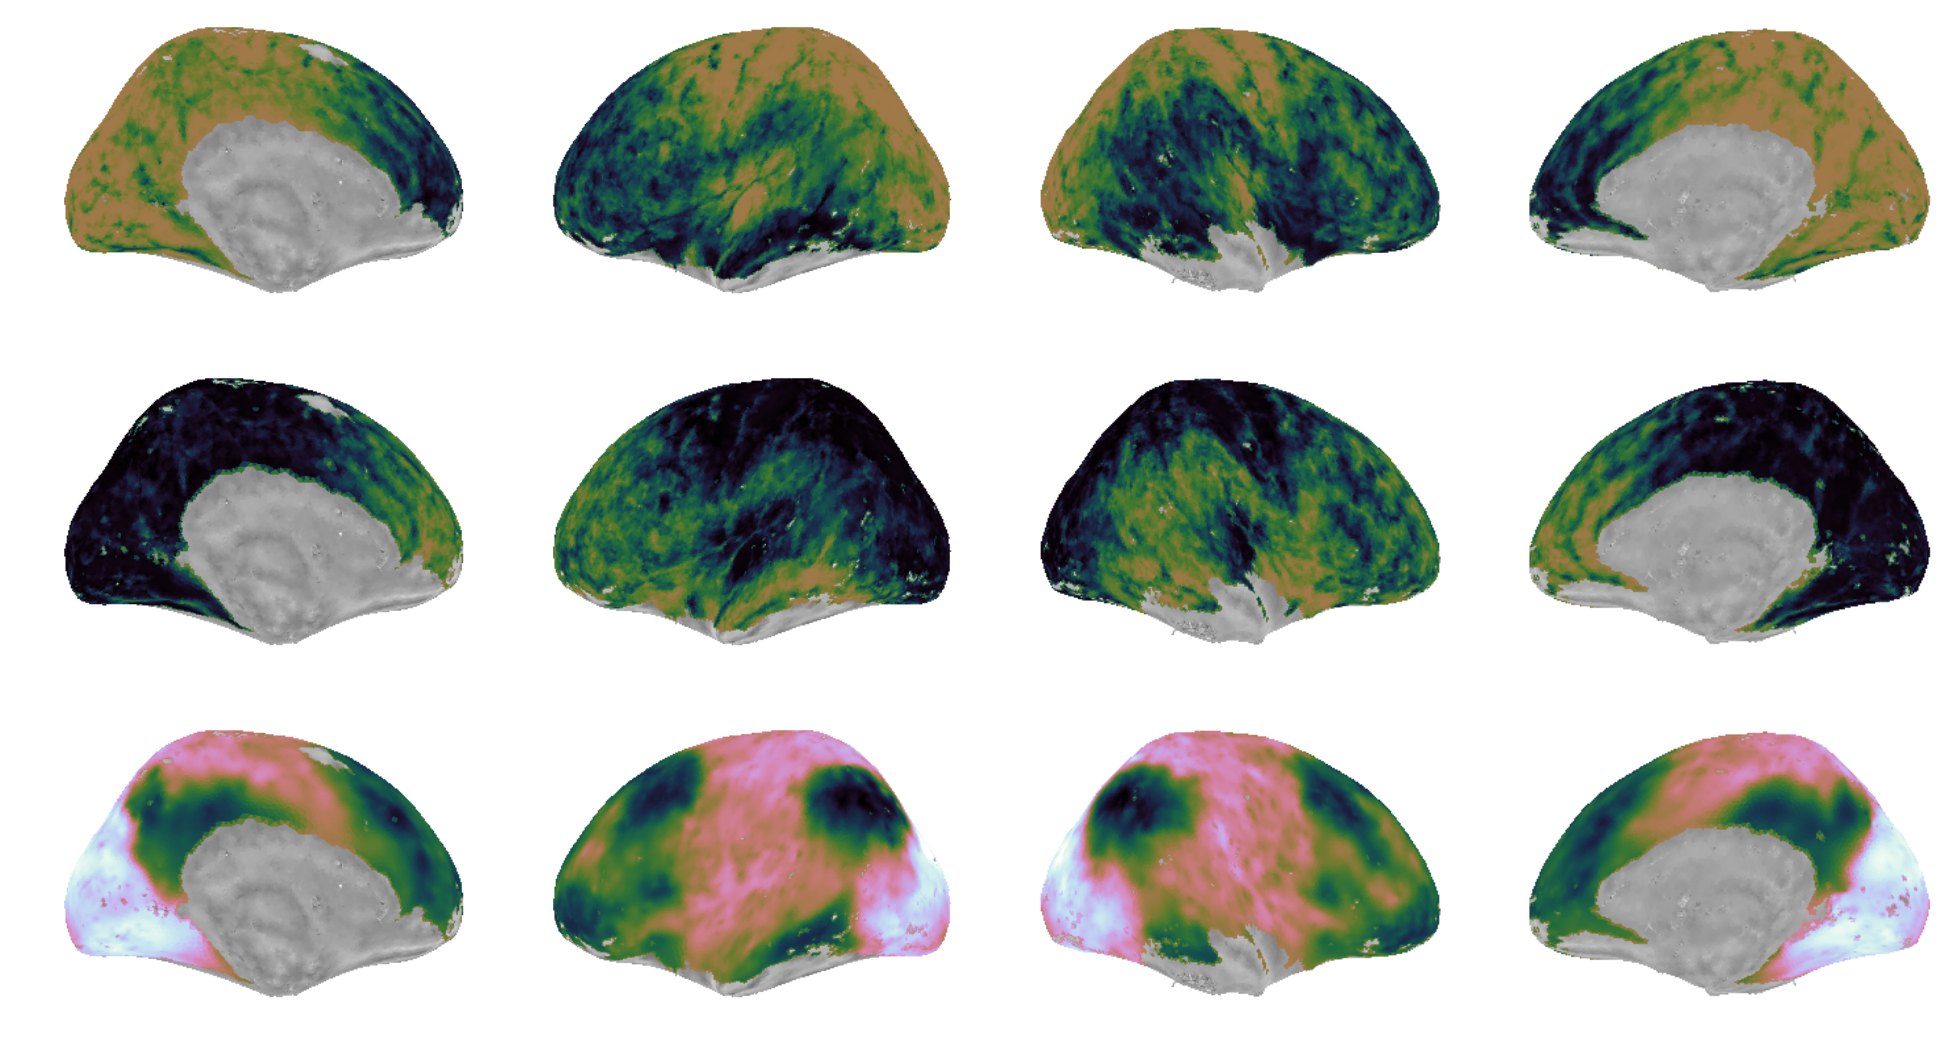

In [29]:
fig = brain_fig(plots_fig1)

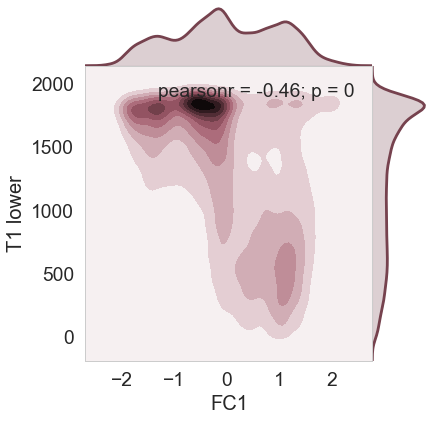

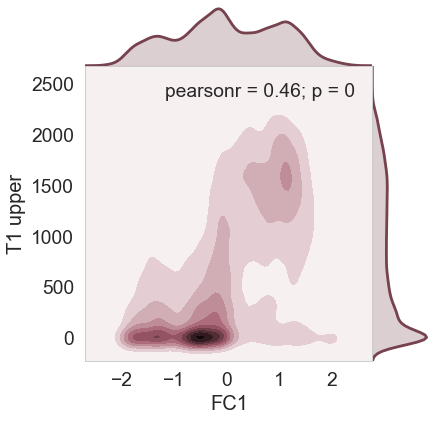

In [38]:
sns.set_style('whitegrid',{'axes.grid': False})
sns.set_context('poster', font_scale=1.2)
scatter_mask = np.where(lower_avg!=0)

#xlim = (-2.5, 2.5)
#ylim = (1600, 2350)
#yticks = [1700, 1900,2100, 2300]
scatter_color = sns.xkcd_rgb['brownish purple']
fig = sns.jointplot(-embed[:,0][scatter_mask], 
                    lower_avg[scatter_mask],
                    space=0,#ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color)
fig.set_axis_labels('FC1', 'T1 lower', fontsize=20)
#fig.ax_joint.set_yticks(yticks);

fig = sns.jointplot(-embed[:,0][scatter_mask], 
                    upper_avg[scatter_mask],
                    space=0,#ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color)
fig.set_axis_labels('FC1', 'T1 upper', fontsize=20)
#fig.ax_joint.set_yticks(yticks);